## Object Detection with Generalized Linear Model: Sign Language


-----
-----

In [1]:
#%% Imports
import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', DeprecationWarning)

import os
import urllib.request
import zipfile

import imageio
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from ipywidgets import interact
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle



In [2]:
#%% Data

fname = '../data/sign-lang.zip'
url   = 'https://github.com/yoavram/Sign-Language/raw/master/Dataset.zip'

if not os.path.exists(fname):
    urllib.request.urlretrieve(url, fname)
print(fname, 'exists:', os.path.exists(fname))

folder = fname.replace('.zip', '')
if not os.path.exists(folder):
    print('Extracting to {}...'.format(folder))
    with zipfile.ZipFile(fname) as f:
        f.extractall('../data/')
print(folder, 'exists:', os.path.exists(folder))

../data/sign-lang.zip exists: True
../data/sign-lang exists: True


im.dtype: uint8 
im.shape:(240, 320, 3)
Metadata:


,image,top_left_x,top_left_y,bottom_right_x,bottom_right_y
0,user_3/A0.jpg,124,18,214,108
1,user_3/A1.jpg,124,18,214,108
2,user_3/A2.jpg,123,19,213,109
3,user_3/A3.jpg,122,21,212,111
4,user_3/A4.jpg,122,20,212,110


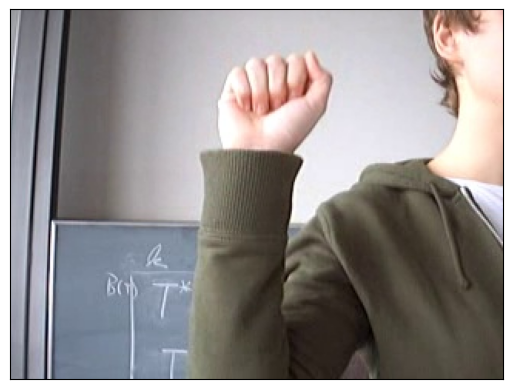

In [3]:
#%% read/Display [SINGLE] Image
# [Func]
def open_image(fimg):
    return imageio.imread(fimg)

#[Func]
def display_image(im, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    ax.imshow(im)
    ax.set(xticks=[], yticks=[])
    return ax

#[Func]
def read_metadata(fname):
    return pd.read_csv(fname)

#_____________________________________________
im = open_image(os.path.join(folder, 'user_3', 'A0.jpg'))
print(f"im.dtype: {im.dtype} \nim.shape:{im.shape}")
display_image(im);

metadata_fname = os.path.join(folder, 'user_3', 'user_3_loc.csv')
metadata = read_metadata(metadata_fname)
print('Metadata:')
metadata.head()



[tlx, tly, brx, bry] = [np.int64(124), np.int64(18), np.int64(214), np.int64(108)]


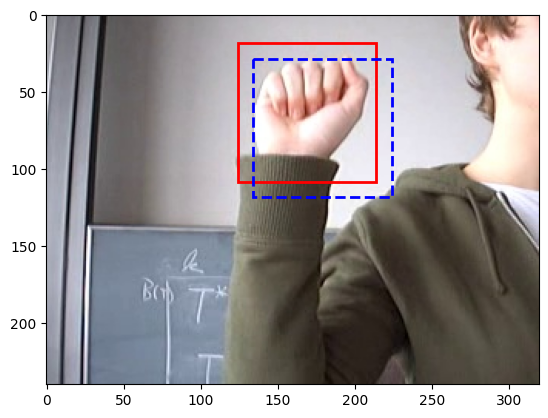

In [4]:
### Display with Bounding Box
row = metadata[metadata['image']=='user_3/A0.jpg']
tlx, tly, brx, bry = [row[k].values[0] for k in row.columns[1::]]
print(f"[tlx, tly, brx, bry] = {[tlx, tly, brx, bry]}")

#[Func]
def display_image_bx(im, *boxes, ax=None):
    if ax is None:
        fix, ax = plt.subplots()
    
    ax.imshow(im)
    for (box, c, ls) in zip(boxes, ['r', 'b'], ['-', '--']):
        rect = plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=2, linestyle=ls, edgecolor=c, facecolor='none')
        ax.add_artist(rect)

display_image_bx(im, [tlx, tly, brx, bry], [tlx+10, tly+10, brx+10, bry+10]);

In [23]:
### Create Data=X
metadata_fname = [] # list of all image file locations
metadata = []
for dirpath, dirnames, filenames in os.walk(folder):
    for fname in filenames:
        if fname.endswith('.csv'):
            metadata_fname.append(os.path.join(dirpath, fname))
# metadata_fname
metadata = pd.concat((pd.read_csv(fname) for fname in metadata_fname), ignore_index=True)
print(f"metadata.shape = {metadata.shape}")
metadata.head()

images = [open_image(os.path.join(folder, file)) for file in metadata["image"]]
images = np.array(images)
print(f"images.shape = {images.shape}")
n_sample, width, height, channels = images.shape
X = images.reshape(n_sample, -1) # Flattening: flat_index = (row * W + col) * C + channel
X = X/255 # Normalize the image data
print(f"X.shape = {X.shape}")

### Labels=Y
Y = metadata[metadata.columns[1::]]
print(f"Y.shape = {Y.shape}")



metadata.shape = (1680, 5)
images.shape = (1680, 240, 320, 3)
X.shape = (1680, 230400)
Y.shape = (1680, 4)


In [ ]:
### Model Fitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)


In [24]:
Y

,top_left_x,top_left_y,bottom_right_x,bottom_right_y
0,186,84,286,184
1,186,84,286,184
2,185,90,285,190
3,180,88,290,198
4,173,102,293,222
...,...,...,...,...
1675,78,23,188,133
1676,68,18,178,128
1677,86,28,196,138
1678,70,37,180,147


In [14]:
images.shape

(1680, 240, 320, 3)

In [19]:
metadata

,image,top_left_x,top_left_y,bottom_right_x,bottom_right_y
0,user_10/A0.jpg,186,84,286,184
1,user_10/A1.jpg,186,84,286,184
2,user_10/A2.jpg,185,90,285,190
3,user_10/A3.jpg,180,88,290,198
4,user_10/A4.jpg,173,102,293,222
...,...,...,...,...,...
235,user_9/Y5.jpg,78,23,188,133
236,user_9/Y6.jpg,68,18,178,128
237,user_9/Y7.jpg,86,28,196,138
238,user_9/Y8.jpg,70,37,180,147


In [25]:
metadata

,image,top_left_x,top_left_y,bottom_right_x,bottom_right_y
0,user_10/A0.jpg,186,84,286,184
1,user_10/A1.jpg,186,84,286,184
2,user_10/A2.jpg,185,90,285,190
3,user_10/A3.jpg,180,88,290,198
4,user_10/A4.jpg,173,102,293,222
...,...,...,...,...,...
1675,user_9/Y5.jpg,78,23,188,133
1676,user_9/Y6.jpg,68,18,178,128
1677,user_9/Y7.jpg,86,28,196,138
1678,user_9/Y8.jpg,70,37,180,147
